# Homework 3: Coding Part
Due: Mar 23, 2023 at 11:00 pm

Submit through Gradescope. Please upload .ipynb

In [1]:
# customary imports:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import glob
import os
import tqdm
from sklearn.model_selection import StratifiedKFold

# 1. Download the white blood cell classification data
The data is hosted online, so we can use the linux command `wget` to download it. If you run into any issues with the data download, please just share your challenges via Slack and we can help sort them out.

In [2]:
# if this breaks please contact the TAs
!wget -O data.zip https://data.mendeley.com/public-files/datasets/snkd93bnjr/files/2fc38728-2ae7-4a62-a857-032af82334c3/file_downloaded
!unzip /content/data.zip
!unzip /content/PBC_dataset_normal_DIB.zip > /dev/null

Streaming output truncated to the last 5000 lines.
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_935950.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_890863.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_519370.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_215077.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_388154.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_968896.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_34345.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_349907.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_245683.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_785122.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_615525.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_714613.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_904757.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_38351.jpg  
  inflating: PBC_dataset_no

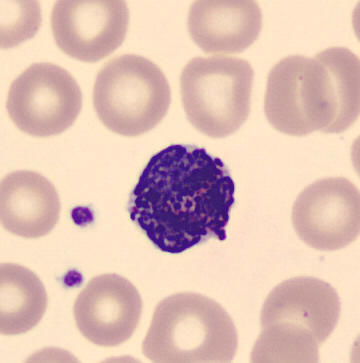

In [2]:
# loading a sample image
sample_image = Image.open("PBC_dataset_normal_DIB/basophil/BA_100102.jpg")
sample_image

(12432, 128, 128, 1) (12432, 8)
(3109, 128, 128, 1) (3109, 8)


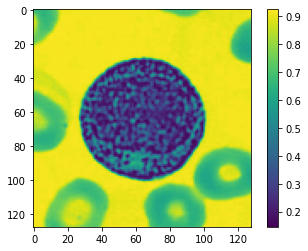

In [3]:
def load_and_crop(image_path, crop_size, normalized=True):
    image = Image.open(image_path).resize([200,200])
    width, height = image.size   # Get dimensions
    left = (width - crop_size)/2
    top = (height - crop_size)/2
    right = (width + crop_size)/2
    bottom = (height + crop_size)/2
    # Crop the center of the image
    image = ImageOps.grayscale(image.crop((left, top, right, bottom)))
    if normalized:
        return np.array(image).astype(np.float32) / 255.0
    else:
        return np.array(image).astype(np.float32)

# code to load all the data, assuming dataset is at PBC_dataset_normal_DIB relative path
cell_types = ['basophil', 'eosinophil', 'erthroblast', 'ig', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']
cell_inds = np.arange(0, len(cell_types))
x_data = []
y_data = []
for cell_ind in cell_inds:
    all_images = glob.glob(os.path.join('PBC_dataset_normal_DIB', cell_types[cell_ind], '*.jpg'))
    x_data += [load_and_crop(image_path, 128) for image_path in all_images]
    y_data += [cell_ind]*len(all_images)

# adding a fake color channel
x_data = np.array(x_data).reshape(-1, 128, 128, 1)
y_data = np.array(y_data)

folder = StratifiedKFold(5, shuffle=True)
x_indices = np.arange(0, len(x_data))
train_indices, val_indices = folder.split(x_indices, y_data).__next__()
# shuffling
np.random.shuffle(train_indices)

x_train = x_data[train_indices]
y_train = np.eye(len(cell_types))[y_data[train_indices]]

x_val = x_data[val_indices]
y_val = np.eye(len(cell_types))[y_data[val_indices]]

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

plt.imshow(x_train[0,:,:,0])
plt.colorbar()

# 2. Define a keras model
You can either use the sequential model class, or the functional model declaration

(a) Please define your model with the following layers:
1. A convolutional layer with a 5x5 kernel and stride of 1
2. A convolutional layer with a 5x5 kernel and stride of 1
3. A pooling layer
4. A convolutional layer with a 5x5 kernel and stride of 1
5. A convolutional layer with a 5x5 kernel and stride of 1
6. A pooling layer
7. A Dense layer
8. Output layer of size 8

You are free to choose the sizes, number of channels and activations (i.e., the employed non-linearity) for each of the layers.

(b) Now, please comment out the pooling layer in step 3 and step 6, and instead increase the stride in the appropriate layers to achieve the same down-sampling effect (i.e., to reduce the size of the tensor in the same way as pooling) 

(c) After defining the model, you should define an optimizer and set a learning rate. You also should pick a loss function.

(d) Run the optimization for 10-15 epochs and monitor the training and validation loss and accuracy. After training is done, please plot two graphs, one showing the training and validation losses as two curves within the same plot, and a second graph that shows the the training and validation accuracies as two curves within the same plot. For both plots, please let epoch be the horizontal axis.

At the end of training, you should be able obtain a validation accuracy better than 75%. Even though you are not getting that it should be fine.

You can refer to the notebook from the TA session or any online TensorFlow resources for guidance.

## (a) Please define your model with the following layers - 5 points
1. A convolutional layer with a 5x5 kernel and stride of 1
2. A convolutional layer with a 5x5 kernel and stride of 1
3. A pooling layer
4. A convolutional layer with a 5x5 kernel and stride of 1
5. A convolutional layer with a 5x5 kernel and stride of 1
6. A pooling layer
7. A Dense layer
8. Output layer of size 8

You are free to choose the sizes, number of channels and activations (i.e., the employed non-linearity) for each of the layers.

In [4]:
cnn_model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Input((128, 128, 1)), # => 128

    # Formula for output_dim = (image_width - filter_size + 2*padding) / stride + 1

    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, strides=(1,1), activation='relu'), # (128 - 5 + 2*0)/1 + 1 => 124
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, strides=(1,1), activation='relu'), # (124 - 5 + 2*0)/1 + 1 => 120

    # max pooling layer:
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), # (120 - 2 + 2*0)/2 + 1 => 60 

    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, strides=(1,1), activation='relu'), # (60 - 5 + 2*0)/1 + 1 => 56
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, strides=(1,1), activation='relu'), # (56 - 5 + 2*0)/1 + 1 => 52

    # max pooling layer:
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), # (52 - 2 + 2*0)/2 + 1 => 26

    # dense layer:
    tf.keras.layers.Flatten(), # => 26 * 26 * 6 => 4056
    tf.keras.layers.Dense(8, activation='softmax')
])

## Print model summary to check all layers output dimensions
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 6)       156       
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 120, 6)       906       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 6)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 6)         906       
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 6)         906       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 6)        0         
 2D)                                                    

## (b) Now, please comment out the pooling layer in step 3 and step 6, and instead increase the stride in the appropriate layers to achieve the same down-sampling effect (i.e., to reduce the size of the tensor in the same way as pooling) - 5 points

In [5]:
cnn_model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Input((128, 128, 1)), # => 128

    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, strides=(1,1), activation='relu'), # (128 - 5 + 2*0)/1 + 1 => 124
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, strides=(2,2), activation='relu'), # floor[ (124 - 5 + 2*0)/2 + 1] => 60 (same as pool result)

    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, strides=(1,1), activation='relu'), # (60 - 5 + 2*0)/1 + 1 => 56
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, strides=(2,2), activation='relu'), # floor[ (56 - 5 + 2*0)/2 + 1 ] => 26

    # dense layer:
    tf.keras.layers.Flatten(), # => 26 * 26 * 6 => 4056
    tf.keras.layers.Dense(8, activation='softmax')

])
## Print model summary to check all layers output dimensions
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 124, 124, 6)       156       
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 6)         906       
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 6)         906       
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 6)         906       
                                                                 
 flatten_1 (Flatten)         (None, 4056)              0         
                                                                 
 dense_1 (Dense)             (None, 8)                 32456     
                                                                 
Total params: 35,330
Trainable params: 35,330
Non-trai

## (c) After defining the model, you should define an optimizer and set a learning rate. You also should pick a loss function. - 5 points

In [6]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # pick an optimizer
                     loss=tf.keras.losses.CategoricalCrossentropy(),  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 124, 124, 6)       156       
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 6)         906       
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 6)         906       
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 6)         906       
                                                                 
 flatten_1 (Flatten)         (None, 4056)              0         
                                                                 
 dense_1 (Dense)             (None, 8)                 32456     
                                                                 
Total params: 35,330
Trainable params: 35,330
Non-trai

## (d) Run the optimization for 10-15 epochs and monitor the training and validation loss and accuracy. - 5 points

At the end of training, you should be able obtain an accuracy better than 75%.  Even though you are not getting that it should be fine.

In [7]:
n_epochs = 10
hist = cnn_model.fit(x_train, y_train,
              epochs=n_epochs,
              batch_size=32,
              validation_data=(x_val, y_val))

Epoch 1/10
389/389 [==============================] - 8s 10ms/step - loss: 1.2633 - accuracy: 0.5135 - val_loss: 0.9282 - val_accuracy: 0.6671
Epoch 2/10
389/389 [==============================] - 4s 9ms/step - loss: 0.9211 - accuracy: 0.6572 - val_loss: 0.8611 - val_accuracy: 0.6867
Epoch 3/10
389/389 [==============================] - 4s 9ms/step - loss: 0.8370 - accuracy: 0.7005 - val_loss: 0.7725 - val_accuracy: 0.7137
Epoch 4/10
389/389 [==============================] - 3s 8ms/step - loss: 0.7653 - accuracy: 0.7178 - val_loss: 0.7434 - val_accuracy: 0.7266
Epoch 5/10
389/389 [==============================] - 4s 9ms/step - loss: 0.7163 - accuracy: 0.7394 - val_loss: 0.6958 - val_accuracy: 0.7366
Epoch 6/10
389/389 [==============================] - 4s 9ms/step - loss: 0.6765 - accuracy: 0.7528 - val_loss: 0.6479 - val_accuracy: 0.7594
Epoch 7/10
389/389 [==============================] - 3s 9ms/step - loss: 0.6404 - accuracy: 0.7649 - val_loss: 0.6343 - val_accuracy: 0.7649
Epoch

## (e) After training is done, please plot two graphs, one showing the training and validation losses as two curves within the same plot, and a second graph that shows the the training and validation accuracies as two curves within the same plot. For both plots, please let epoch be the horizontal axis. - 5 points

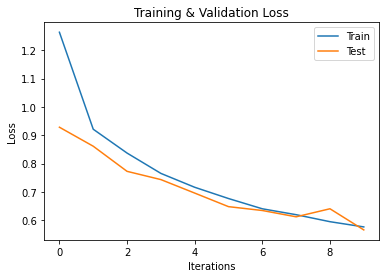

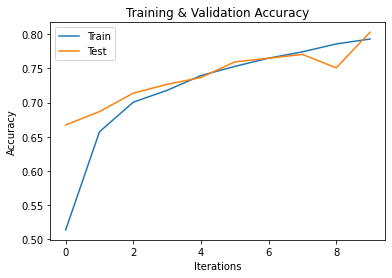

In [8]:
# TODO

## Print train and validation loss
plt.title("Training & Validation Loss")
plt.plot(np.arange(n_epochs), hist.history.get('loss'), label="Train")
plt.plot(np.arange(n_epochs), hist.history.get('val_loss'), label="Test")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show();
print("\n")

## Print train and validation accuracy
plt.title("Training & Validation Accuracy")
plt.plot(np.arange(n_epochs), hist.history.get('accuracy'), label="Train")
plt.plot(np.arange(n_epochs), hist.history.get('val_accuracy'), label="Test")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show();

# 3. How many weight parameters does your network have? - 5 points
First try calculating this number by hand, and show your work (please type out the multiplications that you are performing to arrive at the final number.) Then, please verify the answer using Keras's autogenerated model summary.

## Number of Weight Calculation

#### Conv Layer One: 
- Num of filters = 6
- Each filter size = (5,5)
- Number of input chanels = 1
- Number of weights = 6*5*5*1 = 150
- Number of bias terms = 6
- Total parmaters for layer one => 156

#### Conv Layer Two: 
- Num of filters = 6
- Each filter size = (5,5)
- Number of input chanels = 6
- Number of weights = 6*5*5*6 = 900
- Number of bias terms = 6
- Total parmaters for layer one => 906

#### Conv Layer Three: 
- Num of filters = 6
- Each filter size = (5,5)
- Number of input chanels = 6
- Number of weights = 6*5*5*6 = 900
- Number of bias terms = 6
- Total parmaters for layer one => 906

#### Conv Layer Four: 
- Num of filters = 6
- Each filter size = (5,5)
- Number of input chanels = 6
- Number of weights = 6*5*5*6 = 900
- Number of bias terms = 6
- Total parmaters for layer one => 906

#### Fully Connected Layer: 
- Flattened input = 26 * 26 * 6 = 4056
- Output classes = 8
- Nunmber of weights = 26 * 26 * 6 * 8 => 4056
- Number of bias terms = 8
- Total parmaters for layer one => 32456

### Total Network Weights:
- 156 + 906 + 906 + 906 + 32456
- => 35330
     
                                                                       

In [9]:
## Check number of weights 
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 124, 124, 6)       156       
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 6)         906       
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 6)         906       
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 6)         906       
                                                                 
 flatten_1 (Flatten)         (None, 4056)              0         
                                                                 
 dense_1 (Dense)             (None, 8)                 32456     
                                                                 
Total params: 35,330
Trainable params: 35,330
Non-trai

# 4. Visualize filters
You can obtain weights in individual layers by running 
```
your_model_variable.layers[layer_index].get_weights()
```


## (a) Plot all convolution kernels (i.e., each set of 5x5 weights) in your first convolutional layer. - 5 points

In [10]:
layer_names = [layer.name for layer in cnn_model.layers]
layer_names

['conv2d_4', 'conv2d_5', 'conv2d_6', 'conv2d_7', 'flatten_1', 'dense_1']

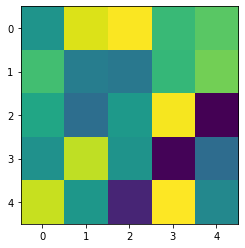

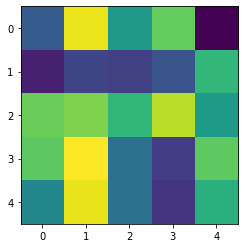

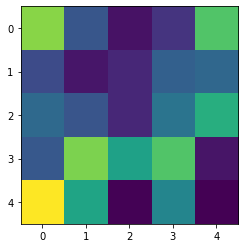

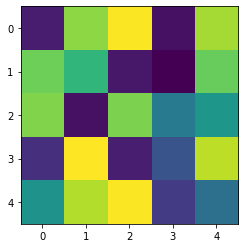

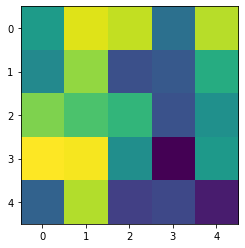

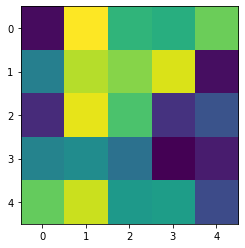

In [11]:
# retrieve weights from the first layer
first_conv_layer_weights = cnn_model.layers[0].get_weights()[0]
first_conv_layer_weights.shape

# normalize filter values to 0-1 so we can visualize them
normalized_weights = []
# Iterate each filter
for i in range(first_conv_layer_weights.shape[3]):
  weights = first_conv_layer_weights[:,:,0,i]

  # Find min and max of weights
  weights_min = np.amin(weights)
  weights_max = np.amax(weights)

  # Normalize and store
  normalized_w = (weights - weights_min) / (weights_max - weights_min)
  normalized_weights.append(normalized_w)

# visualize them
for weights in normalized_weights:
  plt.imshow(weights)
  plt.show();
  print("\n")

## (b) Also plot some of the convolutional weights in the second layer. - 5 points

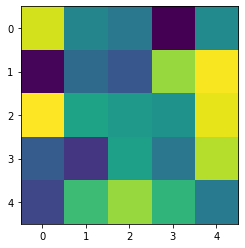

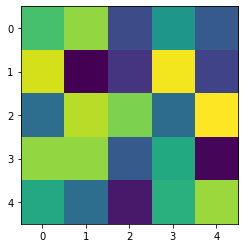

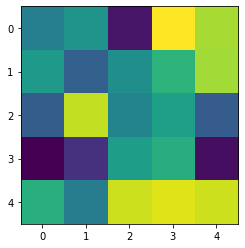

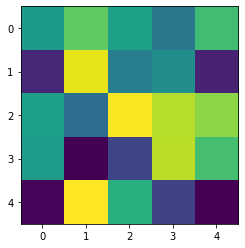

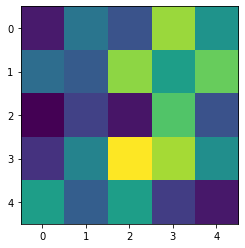

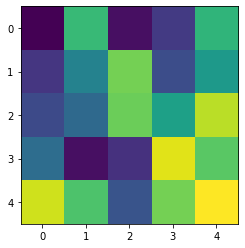

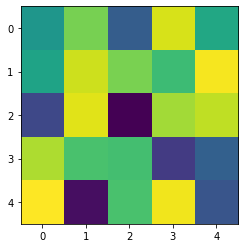

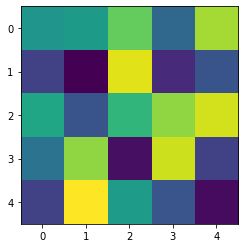

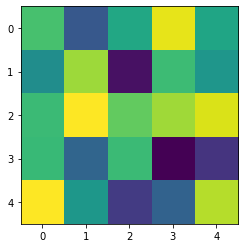

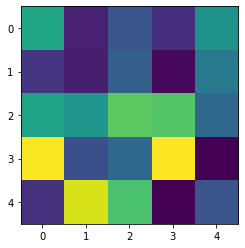

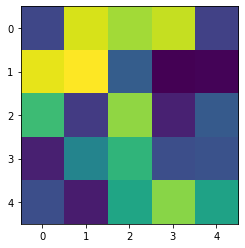

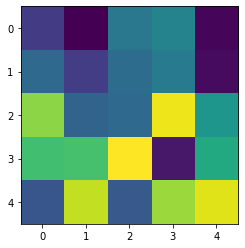

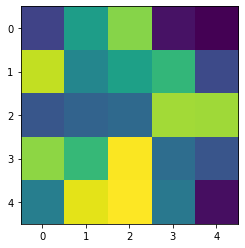

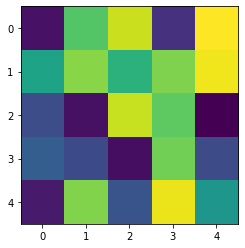

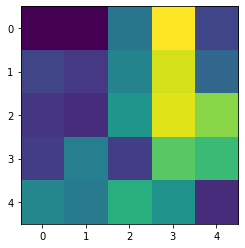

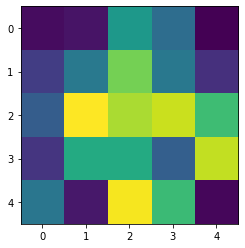

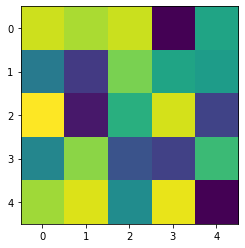

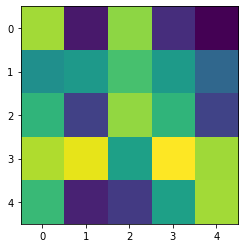

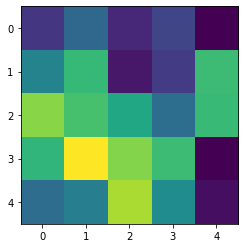

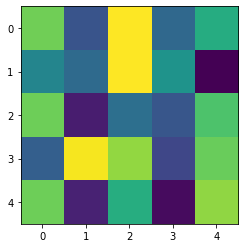

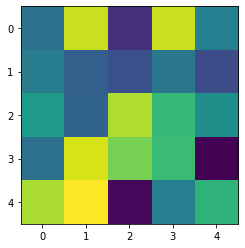

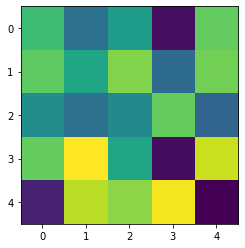

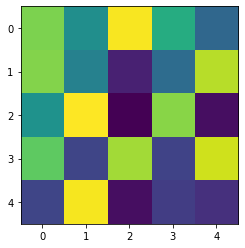

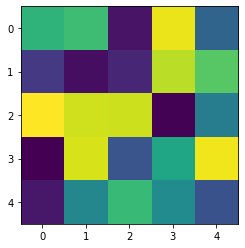

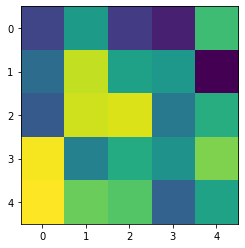

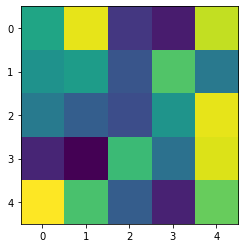

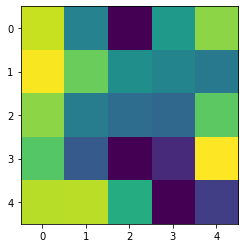

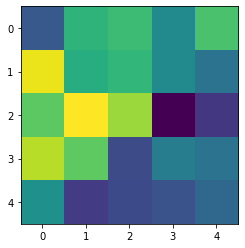

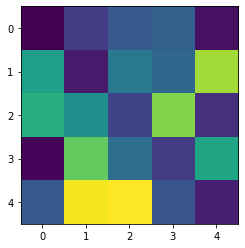

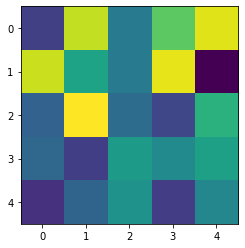

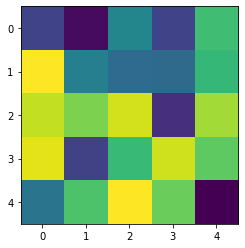

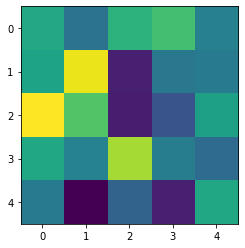

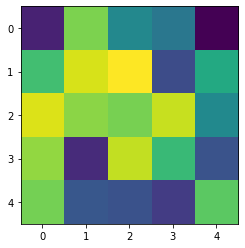

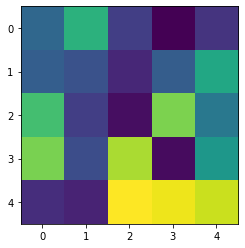

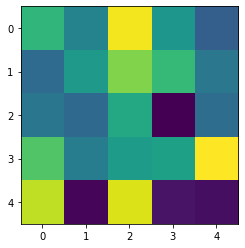

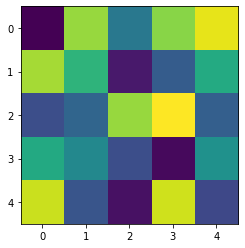

In [12]:
# retrieve weights from the second layer
second_conv_layer_weights = cnn_model.layers[1].get_weights()[0]
second_conv_layer_weights.shape

# normalize filter values to 0-1 so we can visualize them
normalized_weights_layer_2 = []
for i in range(second_conv_layer_weights.shape[3]):
  for j in range(second_conv_layer_weights.shape[2]):
    weights = second_conv_layer_weights[:,:,j,i]

    # Find min and max of weights
    weights_min = np.amin(weights)
    weights_max = np.amax(weights)

    # Normalize and store
    normalized_w = (weights - weights_min) / (weights_max - weights_min)
    normalized_weights_layer_2.append(normalized_w)

# visualize them
for weights in normalized_weights_layer_2:
  plt.imshow(weights)
  plt.show();
  print("\n")

# 5. Try playing with the learning rate

## (a) Try to increase and decrease the learning rate and plot the training and validation loss and accuracy curves. Please use three different learning rates. - 5 points

Epoch 1/10
389/389 [==============================] - 6s 10ms/step - loss: 0.5564 - accuracy: 0.8007 - val_loss: 0.5468 - val_accuracy: 0.8041
Epoch 2/10
389/389 [==============================] - 4s 9ms/step - loss: 0.5439 - accuracy: 0.8049 - val_loss: 0.5458 - val_accuracy: 0.7996
Epoch 3/10
389/389 [==============================] - 4s 9ms/step - loss: 0.5274 - accuracy: 0.8127 - val_loss: 0.5938 - val_accuracy: 0.7819
Epoch 4/10
389/389 [==============================] - 4s 10ms/step - loss: 0.5177 - accuracy: 0.8179 - val_loss: 0.6040 - val_accuracy: 0.7748
Epoch 5/10
389/389 [==============================] - 4s 9ms/step - loss: 0.5140 - accuracy: 0.8158 - val_loss: 0.5174 - val_accuracy: 0.8122
Epoch 6/10
389/389 [==============================] - 4s 9ms/step - loss: 0.4996 - accuracy: 0.8244 - val_loss: 0.5339 - val_accuracy: 0.8099
Epoch 7/10
389/389 [==============================] - 4s 10ms/step - loss: 0.4929 - accuracy: 0.8244 - val_loss: 0.5379 - val_accuracy: 0.8067
Epo

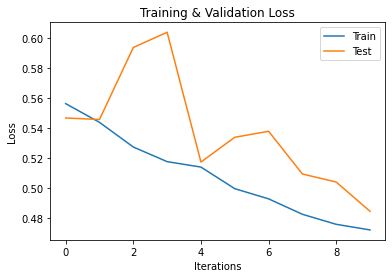

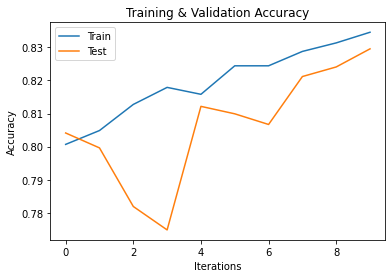

In [13]:
## Update leanring rate to 0.0001
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # pick an optimizer
                     loss=tf.keras.losses.CategoricalCrossentropy(),  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

## Train the model
n_epochs = 10
hist = cnn_model.fit(x_train, y_train,
              epochs=n_epochs,
              batch_size=32,
              validation_data=(x_val, y_val))

## Print train and validation loss
plt.title("Training & Validation Loss")
plt.plot(np.arange(n_epochs), hist.history.get('loss'), label="Train")
plt.plot(np.arange(n_epochs), hist.history.get('val_loss'), label="Test")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show();
print("\n")

## Print train and validation accuracy
plt.title("Training & Validation Accuracy")
plt.plot(np.arange(n_epochs), hist.history.get('accuracy'), label="Train")
plt.plot(np.arange(n_epochs), hist.history.get('val_accuracy'), label="Test")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show();

Epoch 1/10
389/389 [==============================] - 6s 10ms/step - loss: 0.6699 - accuracy: 0.7571 - val_loss: 0.6137 - val_accuracy: 0.7649
Epoch 2/10
389/389 [==============================] - 4s 9ms/step - loss: 0.5270 - accuracy: 0.8123 - val_loss: 0.5072 - val_accuracy: 0.8228
Epoch 3/10
389/389 [==============================] - 4s 9ms/step - loss: 0.4643 - accuracy: 0.8374 - val_loss: 0.4871 - val_accuracy: 0.8205
Epoch 4/10
389/389 [==============================] - 3s 9ms/step - loss: 0.4121 - accuracy: 0.8533 - val_loss: 0.4620 - val_accuracy: 0.8353
Epoch 5/10
389/389 [==============================] - 4s 9ms/step - loss: 0.3758 - accuracy: 0.8671 - val_loss: 0.4169 - val_accuracy: 0.8530
Epoch 6/10
389/389 [==============================] - 4s 9ms/step - loss: 0.3502 - accuracy: 0.8780 - val_loss: 0.4225 - val_accuracy: 0.8553
Epoch 7/10
389/389 [==============================] - 4s 9ms/step - loss: 0.3059 - accuracy: 0.8932 - val_loss: 0.4361 - val_accuracy: 0.8472
Epoch

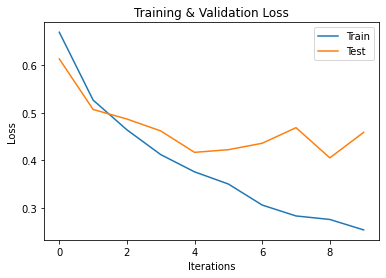

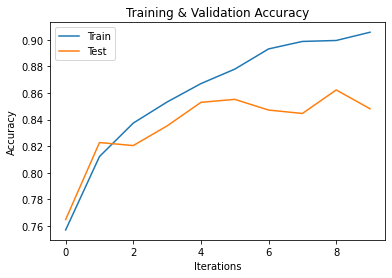

In [14]:
## Update leanring rate to 0.001
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # pick an optimizer
                     loss=tf.keras.losses.CategoricalCrossentropy(),  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

## Train the model
n_epochs = 10
hist = cnn_model.fit(x_train, y_train,
              epochs=n_epochs,
              batch_size=32,
              validation_data=(x_val, y_val))

## Print train and validation loss
plt.title("Training & Validation Loss")
plt.plot(np.arange(n_epochs), hist.history.get('loss'), label="Train")
plt.plot(np.arange(n_epochs), hist.history.get('val_loss'), label="Test")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show();
print("\n")

## Print train and validation accuracy
plt.title("Training & Validation Accuracy")
plt.plot(np.arange(n_epochs), hist.history.get('accuracy'), label="Train")
plt.plot(np.arange(n_epochs), hist.history.get('val_accuracy'), label="Test")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show();

Epoch 1/10
389/389 [==============================] - 5s 10ms/step - loss: 0.8988 - accuracy: 0.6939 - val_loss: 0.7185 - val_accuracy: 0.7366
Epoch 2/10
389/389 [==============================] - 4s 9ms/step - loss: 0.6215 - accuracy: 0.7731 - val_loss: 0.7528 - val_accuracy: 0.7189
Epoch 3/10
389/389 [==============================] - 4s 10ms/step - loss: 0.5837 - accuracy: 0.7810 - val_loss: 0.6608 - val_accuracy: 0.7594
Epoch 4/10
389/389 [==============================] - 4s 9ms/step - loss: 0.5175 - accuracy: 0.8081 - val_loss: 0.6792 - val_accuracy: 0.7449
Epoch 5/10
389/389 [==============================] - 4s 9ms/step - loss: 0.5056 - accuracy: 0.8112 - val_loss: 0.6859 - val_accuracy: 0.7530
Epoch 6/10
389/389 [==============================] - 4s 10ms/step - loss: 0.4725 - accuracy: 0.8242 - val_loss: 0.7718 - val_accuracy: 0.7565
Epoch 7/10
389/389 [==============================] - 4s 10ms/step - loss: 0.4311 - accuracy: 0.8389 - val_loss: 0.7121 - val_accuracy: 0.7681
Ep

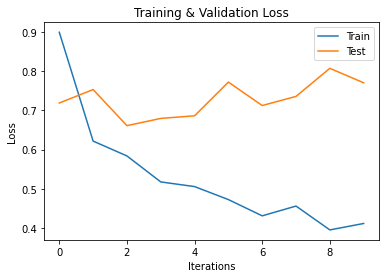

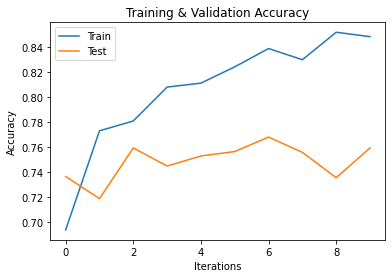

In [15]:
## Update leanring rate to 0.01
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # pick an optimizer
                     loss=tf.keras.losses.CategoricalCrossentropy(),  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

## Train the model
n_epochs = 10
hist = cnn_model.fit(x_train, y_train,
              epochs=n_epochs,
              batch_size=32,
              validation_data=(x_val, y_val))

## Print train and validation loss
plt.title("Training & Validation Loss")
plt.plot(np.arange(n_epochs), hist.history.get('loss'), label="Train")
plt.plot(np.arange(n_epochs), hist.history.get('val_loss'), label="Test")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show();
print("\n")

## Print train and validation accuracy
plt.title("Training & Validation Accuracy")
plt.plot(np.arange(n_epochs), hist.history.get('accuracy'), label="Train")
plt.plot(np.arange(n_epochs), hist.history.get('val_accuracy'), label="Test")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show();

## (b) Please comment on any trends that you can identify between how the plots change as a function of learning rate. Specifically, what happens to the slopes of the training loss and accuracy as a function of learning rate? - 5 points

- Ans: 
  - I used three different learning rate as follows:
    - 1) lr=0.0001 (train_acc = 83%, test_acc = 82%)
    - 2) lr=0.001  (train_acc = 90%, test_acc = 84%)
    - 3) lr=0.01   (train_acc = 84%, test_acc = 75%)

  - I observe that as we increase the learning rate, the accuracy on train does start to increase, but clearly the model is overfitting (as we can see that the distance b/w train and validation accuracy is increasing apart)

# 6. Adding Batch Norm - 5 points
Fix a value of the learning rate and try adding Batch Normalization after the second and fourth conv layers. Please plot the training and validation loss and accuracy curves. Does it improve the performance of your model? Explain briefly.

- Ans:
  - Following were the results with and without batchnorm:
    - lr=0.0001, No batch norm   (train_acc = 83%, test_acc = 82%)
    - lr=0.0001, With batch norm (train_acc = 85%, test_acc = 82%)

  - I see there is a little improvement in terms of accuracy performance, but there is a lot of stableization in terms of the model training process (the loss plots have become more stable when batch norm was used as compared to more flucuating loss without batch norm)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 124, 124, 6)       156       
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 60, 6)         906       
                                                                 
 batch_normalization_2 (Batc  (None, 60, 60, 6)        24        
 hNormalization)                                                 
                                                                 
 conv2d_14 (Conv2D)          (None, 56, 56, 6)         906       
                                                                 
 conv2d_15 (Conv2D)          (None, 26, 26, 6)         906       
                                                                 
 batch_normalization_3 (Batc  (None, 26, 26, 6)        24        
 hNormalization)                                      

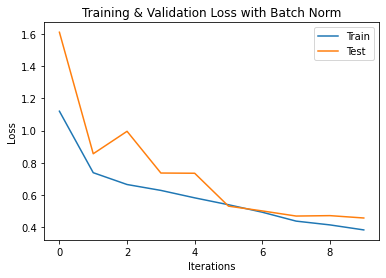

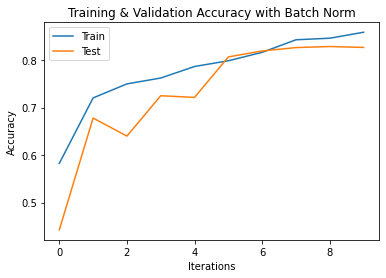

In [17]:
# TODO
## Defined updated model with batch norm layer
cnn_model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Input((128, 128, 1)), # => 128

    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, strides=(1,1), activation='relu'), # (128 - 5 + 2*0)/1 + 1 => 124
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, strides=(2,2), activation='relu'), # floor[ (124 - 5 + 2*0)/2 + 1] => 60 (same as pool result)
    # Newly added Batch Norm Layer
    tf.keras.layers.BatchNormalization(),
    
    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, strides=(1,1), activation='relu'), # (60 - 5 + 2*0)/1 + 1 => 56
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, strides=(2,2), activation='relu'), # floor[ (56 - 5 + 2*0)/2 + 1 ] => 26
    # Newly added Batch Norm Layer
    tf.keras.layers.BatchNormalization(),

    # dense layer:
    tf.keras.layers.Flatten(), # => 26 * 26 * 6 => 4056
    tf.keras.layers.Dense(8, activation='softmax')

])
## Print model summary to check all layers output dimensions
cnn_model.summary()

## Update leanring rate to 0.0001
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # pick an optimizer
                     loss=tf.keras.losses.CategoricalCrossentropy(),  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

## Train the model
n_epochs = 10
hist = cnn_model.fit(x_train, y_train,
              epochs=n_epochs,
              batch_size=32,
              validation_data=(x_val, y_val))

## Print train and validation loss
plt.title("Training & Validation Loss with Batch Norm")
plt.plot(np.arange(n_epochs), hist.history.get('loss'), label="Train")
plt.plot(np.arange(n_epochs), hist.history.get('val_loss'), label="Test")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show();
print("\n")

## Print train and validation accuracy
plt.title("Training & Validation Accuracy with Batch Norm")
plt.plot(np.arange(n_epochs), hist.history.get('accuracy'), label="Train")
plt.plot(np.arange(n_epochs), hist.history.get('val_accuracy'), label="Test")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show();

# 7. Data Augmetation - 5 points
Now, instead of giving the dataset directly to the network, augment it first using:
```
keras.preprocessing.image.ImageDataGenerator
```
Specifically, use vertical and horizontal flips and 20 degrees rotation. Feel free to consult the documentation for this function.

Please plot the training and validation loss and accuracy curves. What effect does this have on your model?

[Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

- Ans:
  - I observe that after using Data augmentation it improves the generalizating ability of the model, redcucing overfitting and increasing robustness and accuracy of the model

In [18]:
# Define image augmentation steps
data_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True
)

Epoch 1/10
389/389 [==============================] - 28s 57ms/step - loss: 1.0468 - accuracy: 0.6046 - val_loss: 2.6550 - val_accuracy: 0.3660
Epoch 2/10
389/389 [==============================] - 22s 56ms/step - loss: 0.6695 - accuracy: 0.7517 - val_loss: 0.6019 - val_accuracy: 0.7697
Epoch 3/10
389/389 [==============================] - 22s 57ms/step - loss: 0.5817 - accuracy: 0.7849 - val_loss: 0.5490 - val_accuracy: 0.8044
Epoch 4/10
389/389 [==============================] - 22s 56ms/step - loss: 0.5329 - accuracy: 0.8042 - val_loss: 0.4877 - val_accuracy: 0.8253
Epoch 5/10
389/389 [==============================] - 22s 56ms/step - loss: 0.4959 - accuracy: 0.8199 - val_loss: 0.4857 - val_accuracy: 0.8163
Epoch 6/10
389/389 [==============================] - 21s 55ms/step - loss: 0.4789 - accuracy: 0.8231 - val_loss: 0.5576 - val_accuracy: 0.7990
Epoch 7/10
389/389 [==============================] - 25s 64ms/step - loss: 0.4598 - accuracy: 0.8308 - val_loss: 0.4663 - val_accuracy:

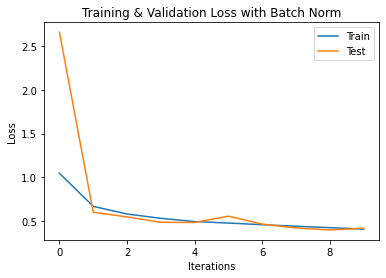

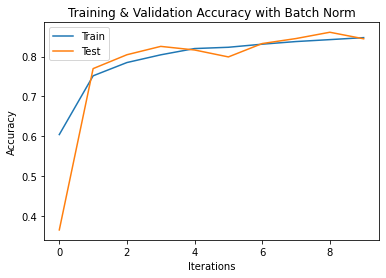

In [20]:

# model
cnn_model = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Input((128, 128, 1)), # => 128

    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, strides=(1,1), activation='relu'), # (128 - 5 + 2*0)/1 + 1 => 124
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, strides=(2,2), activation='relu'), # floor[ (124 - 5 + 2*0)/2 + 1] => 60 (same as pool result)
    # Newly added Batch Norm Layer
    tf.keras.layers.BatchNormalization(),
    
    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, strides=(1,1), activation='relu'), # (60 - 5 + 2*0)/1 + 1 => 56
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, strides=(2,2), activation='relu'), # floor[ (56 - 5 + 2*0)/2 + 1 ] => 26
    # Newly added Batch Norm Layer
    tf.keras.layers.BatchNormalization(),

    # dense layer:
    tf.keras.layers.Flatten(), # => 26 * 26 * 6 => 4056
    tf.keras.layers.Dense(8, activation='softmax')

])

# compile
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # pick an optimizer
                     loss=tf.keras.losses.CategoricalCrossentropy(),  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

# Can you notice the difference?
hist = cnn_model.fit(data_aug.flow(x_train, y_train, batch_size=32),
              epochs=10,
              validation_data=data_aug.flow(x_val, y_val))

## Print train and validation loss
plt.title("Training & Validation Loss with Batch Norm")
plt.plot(np.arange(n_epochs), hist.history.get('loss'), label="Train")
plt.plot(np.arange(n_epochs), hist.history.get('val_loss'), label="Test")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show();
print("\n")

## Print train and validation accuracy
plt.title("Training & Validation Accuracy with Batch Norm")
plt.plot(np.arange(n_epochs), hist.history.get('accuracy'), label="Train")
plt.plot(np.arange(n_epochs), hist.history.get('val_accuracy'), label="Test")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show();

# 8. Custom layer for Fourier filtering

Note: this problem requires some careful bug-checking

Now, we will implement a custom layer that doesn't exist in keras -- Fourier filtering. Your layer should apply the 2D Fourier transform (`tf.signal.fft2d`) to each channel of the input, multiply element-wise by an optimizable mask (the same one for each channel), apply the 2D inverse Fourier transform (`tf.signal.ifft2d`), and then take the absolute value. Note: 
- You will have to use the tf versions of all operations, NOT the numpy versions. 
- The fft2d operations in tensorflow are done on the LAST two dimensions, which is at odds with the default dimension ordering of CNNs. Thus, you will need to use `tf.transpose` on the input and then transpose back after the filtering operation.
- Use dtype `tf.complex64`, which is basically a combination of two `tf.float32`s. You will have to explicitly cast between these two data types, because the input/output will be `tf.float32`, but intermediate steps will be `tf.complex64`.

Initialize your optimizable Fourier masks using a binary circular mask (1's inside the circle, 0's outside), with a radius given by 1/4 of the square image dimension (you can round if not divisible by 4). 

After defining this custom layer, copy your previously defined CNN above and insert this new layer as the first layer. To verify that your layer is working correctly, plot some example outputs of the first layer.

In [26]:
# There is no 2D fftshift in tf. Please use this instead.
def tf_fftshift2(A):
    # 2D fftshift
    # apply fftshift to the last two dims
    s = tf.shape(A)
    s1 = s[-2]
    s2 = s[-1]
    A = tf.concat([A[..., s1//2:, :], A[..., :s1//2, :]], axis=-2)
    A = tf.concat([A[..., :, s2//2:], A[..., :, :s2//2]], axis=-1)
    return A

## (a) Create circular mask - 5 points

Image Shape:  (128, 128, 1)


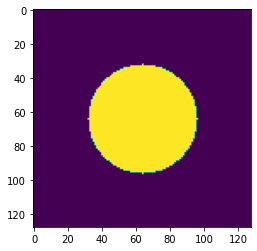

In [28]:
def create_circular_mask(h, w, radius):

    ## Initialize a mask with 0's of height h and width w
    mask = tf.Variable(tf.zeros((h, w), dtype=tf.complex64), trainable=True)

    ## Create a blank grid for mask pixels
    Y, X = tf.meshgrid(tf.range(h), tf.range(w))
    
    ## Compute center of circle
    center = (int(w/2), int(h/2))

    ## Calculate distance from center for each pixel in our mask
    dist_from_center = tf.math.sqrt(tf.cast(tf.math.square(X - center[0]) + tf.math.square(Y - center[1]), tf.float32))

    ## Fill 1 where distance is within (lessthan) radius and otherwise 0
    mask.assign(tf.cast(tf.where(dist_from_center <= radius, 1, 0), tf.complex64))
    
    return mask
  
## Test Mask
img = tf.ones(shape=(128, 128, 1))
print("Image Shape: ", img.shape)
mask_check = create_circular_mask(h=img.shape[0], w=img.shape[1], radius= int((1/4)*img.shape[0]))
plt.imshow(np.abs(mask_check))
plt.show();

## (b) Create FourierFilter class - 25 points

In [29]:
class FourierFilter(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()

    def build(self, input_shape):
      ## Initialze trainable circular mask using the function we created above
      self.mask_weights = self.get_mask(input_shape)


    def get_mask(self, input_shape):
        return create_circular_mask( h=input_shape[1], w=input_shape[2], radius=int((1/4)*input_shape[1]) )

    def call(self, input):
        ## Transpose the input [B,H,W,C] to [B,C,H,W] to apply 2d fourier transform
        input_transposed = tf.transpose(input, [0, 3, 1, 2])

        ## Cast the input_transpose matrix to complex numbers as fft2d expects complex input vals
        input_transposed_complex = tf.cast(input_transposed, tf.complex64)

        ## Apply 2d Fourier Transform
        images_fft = tf.signal.fft2d(input_transposed_complex)

        ## Shift the zero-frequency component to the center of the spectrum
        images_fft_shifted = tf_fftshift2(images_fft)

        ## Apply the circle mask
        image_fft_shifted_filtered = images_fft_shifted * self.mask_weights

        ## Inverse shift
        images_fft_shifted_filtered = tf_fftshift2(image_fft_shifted_filtered)

        ## Inverse Fourier Transform
        images_filtered = tf.signal.ifft2d(images_fft_shifted_filtered)

        ## Get back the real part float32
        images_filtered_real = tf.abs(images_filtered)

        ## Traspose back to original shape
        images_filtered_real_back_transpose = tf.transpose(images_filtered_real, [0, 3, 2, 1])

        return images_filtered_real_back_transpose

## (c) Training. - 5 points

Epoch 1/10
389/389 [==============================] - 29s 65ms/step - loss: 1.1632 - accuracy: 0.5693 - val_loss: 3.4612 - val_accuracy: 0.1512
Epoch 2/10
389/389 [==============================] - 23s 59ms/step - loss: 0.7034 - accuracy: 0.7373 - val_loss: 0.7043 - val_accuracy: 0.7237
Epoch 3/10
389/389 [==============================] - 26s 66ms/step - loss: 0.6169 - accuracy: 0.7648 - val_loss: 0.5612 - val_accuracy: 0.7951
Epoch 4/10
389/389 [==============================] - 25s 63ms/step - loss: 0.5578 - accuracy: 0.7922 - val_loss: 0.5287 - val_accuracy: 0.7990
Epoch 5/10
389/389 [==============================] - 26s 66ms/step - loss: 0.5262 - accuracy: 0.8042 - val_loss: 0.4850 - val_accuracy: 0.8225
Epoch 6/10
389/389 [==============================] - 26s 67ms/step - loss: 0.4984 - accuracy: 0.8167 - val_loss: 0.4806 - val_accuracy: 0.8160
Epoch 7/10
389/389 [==============================] - 28s 72ms/step - loss: 0.4850 - accuracy: 0.8211 - val_loss: 0.4527 - val_accuracy:

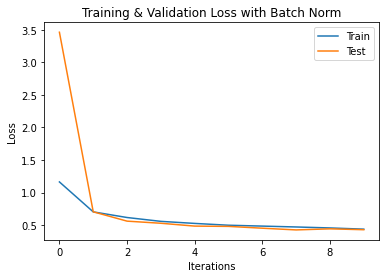

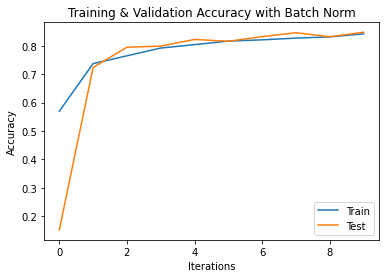

In [30]:
# TODO

# model
cnn_model = tf.keras.models.Sequential([
    # Custom Fourier Layer
    FourierFilter(),

    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, strides=(1,1), activation='relu'), # (128 - 5 + 2*0)/1 + 1 => 124
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, strides=(2,2), activation='relu'), # floor[ (124 - 5 + 2*0)/2 + 1] => 60 (same as pool result)
    # Newly added Batch Norm Layer
    tf.keras.layers.BatchNormalization(),
    
    # convolutional layers:
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, strides=(1,1), activation='relu'), # (60 - 5 + 2*0)/1 + 1 => 56
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, strides=(2,2), activation='relu'), # floor[ (56 - 5 + 2*0)/2 + 1 ] => 26
    # Newly added Batch Norm Layer
    tf.keras.layers.BatchNormalization(),

    # dense layer:
    tf.keras.layers.Flatten(), # => 26 * 26 * 6 => 4056
    tf.keras.layers.Dense(8, activation='softmax')

])

# compile
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # pick an optimizer
                     loss=tf.keras.losses.CategoricalCrossentropy(),  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

# Can you notice the difference?
hist = cnn_model.fit(data_aug.flow(x_train, y_train, batch_size=32),
              epochs=10,
              validation_data=data_aug.flow(x_val, y_val))

## Print train and validation loss
plt.title("Training & Validation Loss with Batch Norm")
plt.plot(np.arange(n_epochs), hist.history.get('loss'), label="Train")
plt.plot(np.arange(n_epochs), hist.history.get('val_loss'), label="Test")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(loc='best')
plt.show();
print("\n")

## Print train and validation accuracy
plt.title("Training & Validation Accuracy with Batch Norm")
plt.plot(np.arange(n_epochs), hist.history.get('accuracy'), label="Train")
plt.plot(np.arange(n_epochs), hist.history.get('val_accuracy'), label="Test")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show();

## (d) Please compare the masks before and after training. - 5 points

MASK Before Training


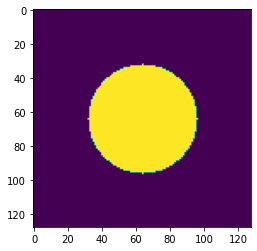



MASK After Training


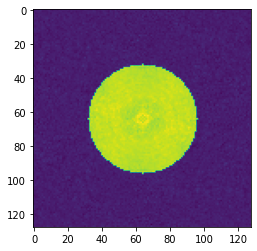

In [31]:
# TODO

## OLD Mask before training
print("MASK Before Training")
test_img = x_train[0].copy()
mask_check = create_circular_mask(h=test_img.shape[0], w=test_img.shape[1], radius= int((1/4)*test_img.shape[0]))
plt.imshow(np.abs(mask_check))
plt.show();
print("\n")

## Mask after training
print("MASK After Training")
# retrieve weights from the first layer
fourier_input_layer_weights = cnn_model.layers[0].get_weights()[0]
fourier_input_layer_weights.shape

# Find min and max of weights
weights_min = np.amin(fourier_input_layer_weights)
weights_max = np.amax(fourier_input_layer_weights)

# Normalize
normalized_weights = (fourier_input_layer_weights - weights_min) / (weights_max - weights_min)
plt.imshow(np.abs(normalized_weights))
plt.show();
print("\n")